In [246]:
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve

In [247]:
train_df = pd.read_csv("titanic_train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [248]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [249]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [250]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

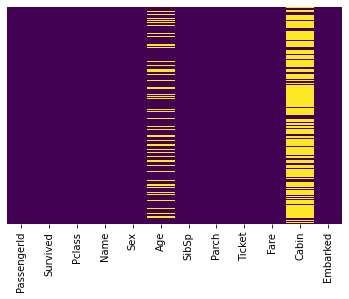

In [252]:
sns.heatmap(train_df.isnull(),yticklabels = False , cbar = False , cmap = 'viridis')

In [253]:
train_df.duplicated().sum()

0

## Analysis survived or not with Age and sex data. 

C:\Users\shuvomamun\anaconda3\Anaconda2109\Anaconda94\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


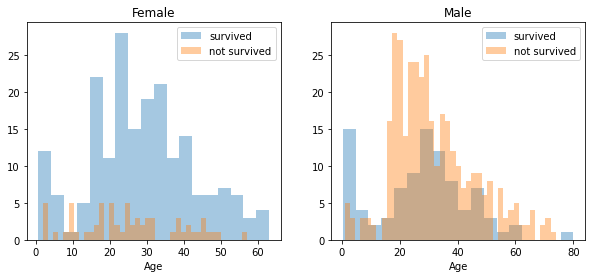

In [254]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

#### SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that sows if someone is not alone.

In [255]:
data = [train_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [256]:
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\shuvomamun\anaconda3\Anaconda2109\Anaconda94\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\shuvomamun\anaconda3\Anaconda2109\Anaconda94\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


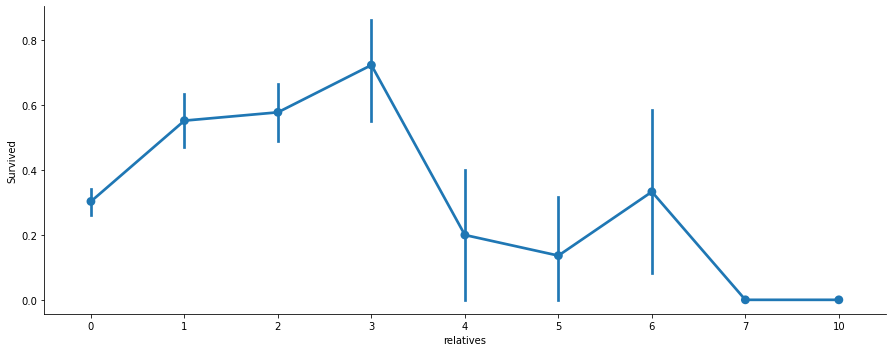

In [257]:
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )

#### Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

# Data Preprocessing

In [258]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [259]:
test_df = pd.read_csv("titanic_test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Cabin

In [260]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 

In [261]:
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)

### Age

In [262]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

### Embarked

In [263]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [264]:
# Since the Embarked feature has only 2 missing values, we will just fill 
# these with the most common one.

common_value = 'S'
data = [train_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [265]:
# Convert 'Embarked' feature into numeric.

ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [266]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
relatives      0
not_alone      0
Deck           0
dtype: int64

<AxesSubplot:>

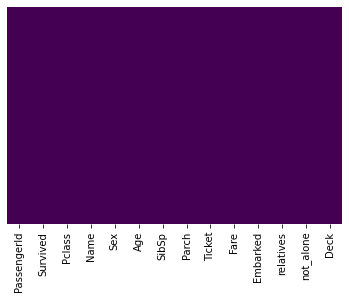

In [267]:
sns.heatmap(train_df.isnull(),yticklabels = False , cbar = False , cmap = 'viridis')

#### Converting "Fare" from float to int64, using the "astype()" function pandas provides:

### Fare

In [268]:
data = [train_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [269]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,0,1,0,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,1,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,0,0,1,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,0,1,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,0,0,1,8


### Name

In [270]:
train_df['Name'].describe()

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

In [271]:
train_df = train_df.drop(['Name'], axis=1)

### Ticket

In [272]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [273]:
train_df = train_df.drop(['Ticket'], axis=1)

### Sex

In [274]:
# Convert 'Sex' feature into numeric.

genders = {"male": 0, "female": 1}
data = [train_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

### Age devided sevarel Group.

In [275]:
# Now we need to convert the 'age' feature.
# First we will convert it from float into integer


data = [train_df]
for dataset in data:
    #dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [276]:
# let's see how it's distributed
train_df['Age'].value_counts()

6    163
4    158
5    148
3    135
2    115
1    104
0     68
Name: Age, dtype: int64

In [277]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [278]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck
0,0,3,0,2,1,0,7,0,1,0,8
1,1,1,1,5,1,0,71,1,1,0,3
2,1,3,1,3,0,0,7,0,0,1,8
3,1,1,1,5,1,0,53,0,1,0,3
4,0,3,0,5,0,0,8,0,0,1,8
5,0,3,0,4,0,0,8,2,0,1,8
6,0,1,0,6,0,0,51,0,0,1,5
7,0,3,0,0,3,1,21,0,4,0,8
8,1,3,1,3,0,2,11,0,2,0,8
9,1,2,1,1,1,0,30,1,1,0,8


#### Classification of Fare

In [279]:
data = [train_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    #dataset['Fare'].astype('int', errors='ignore')

In [280]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [281]:
train_df['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

In [282]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,0
1,1,1,1,5,1,0,3,1,1,0,3,1
2,1,3,1,3,0,0,0,0,0,1,8,0
3,1,1,1,5,1,0,3,0,1,0,3,1
4,0,3,0,5,0,0,1,0,0,1,8,1
5,0,3,0,4,0,0,1,2,0,1,8,1
6,0,1,0,6,0,0,3,0,0,1,5,3
7,0,3,0,0,3,1,2,0,4,0,8,0
8,1,3,1,3,0,2,1,0,2,0,8,0
9,1,2,1,1,1,0,2,1,1,0,8,1


## Creating  New Feature

###  Age times Class

In [283]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [284]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Fare_Per_Person,Age_Class
0,0,3,0,2,1,0,0,0,1,0,8,0,6
1,1,1,1,5,1,0,3,1,1,0,3,1,5
2,1,3,1,3,0,0,0,0,0,1,8,0,9
3,1,1,1,5,1,0,3,0,1,0,3,1,5
4,0,3,0,5,0,0,1,0,0,1,8,1,15
5,0,3,0,4,0,0,1,2,0,1,8,1,12
6,0,1,0,6,0,0,3,0,0,1,5,3,6
7,0,3,0,0,3,1,2,0,4,0,8,0,0
8,1,3,1,3,0,2,1,0,2,0,8,0,9
9,1,2,1,1,1,0,2,1,1,0,8,1,2


## Building Machine Learning Models

In [285]:
# X_train = train_df.drop("Survived", axis=1)
# Y_train = train_df["Survived"]
# #X_test  = test_df.drop("PassengerId", axis=1).copy()

In [294]:
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

In [295]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [296]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# LogisticRegression

In [319]:
model_list = []
score_list = []

model1 = LogisticRegression()
model1.fit(X_train, y_train)
score1 = accuracy_score(y_test, model1.predict(X_test))
print("Model :LRG")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score1))

model_list.append('LRG')

score_list.append(score1)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model1.predict(X_test))))

print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model1.predict(X_test))))

Model :LRG
Accuracy : 0.80
Recall_Score : 0.73
precission_Score : 0.77


# RandomForest

In [320]:
model2 = RandomForestClassifier(n_estimators=100)
model2.fit(X_train, y_train)
score2 = accuracy_score(y_test, model2.predict(X_test))
print("Model : RF")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score2))

model_list.append('RF')
score_list.append(score2)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model2.predict(X_test))))

print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model2.predict(X_test))))

Model : RF
Accuracy : 0.81
Recall_Score : 0.74
precission_Score : 0.79


# GradientBoosting

In [321]:
model3 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01)
model3.fit(X_train, y_train)
score3 = accuracy_score(y_test, model3.predict(X_test))
print("Model : GB ")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score3))
model_list.append('GB')
score_list.append(score3)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model3.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model3.predict(X_test))))

Model : GB 
Accuracy : 0.82
Recall_Score : 0.73
precission_Score : 0.82


# SVC

In [322]:
model5 = SVC(kernel = 'rbf',  random_state = 2)
model5.fit(X_train, y_train)
score5 = accuracy_score(y_test, model5.predict(X_test))
print("Model : SVC")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score5))
model_list.append('SVC')
score_list.append(score5)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model5.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model5.predict(X_test))))

Model : SVC
Accuracy : 0.82
Recall_Score : 0.72
precission_Score : 0.83


# GaussianNB

In [331]:
model6 = GaussianNB()
model6.fit(X_train, y_train)
score6 = accuracy_score(y_test, model6.predict(X_test))
print("Model : GNB")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score6))
model_list.append('GNB')
score_list.append(score6)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model6.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model6.predict(X_test))))

Model : GNB
Accuracy : 0.80
Recall_Score : 0.85
precission_Score : 0.72


# AdaBoost

In [332]:
model4 = AdaBoostClassifier()
model4.fit(X_train, y_train)
score4 = accuracy_score(y_test, model4.predict(X_test))
print("Model : ADB")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score4))
model_list.append('ADB')
score_list.append(score4)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model4.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model4.predict(X_test))))

Model : ADB
Accuracy : 0.78
Recall_Score : 0.73
precission_Score : 0.74


# SGDClassifier

In [333]:
model7 = linear_model.SGDClassifier(max_iter=5, tol=None)
model7.fit(X_train, y_train)
score7 = accuracy_score(y_test, model7.predict(X_test))
print("Model : SGD")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score4))
model_list.append('SGD')
score_list.append(score5)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model7.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model7.predict(X_test))))

Model : SGD
Accuracy : 0.78
Recall_Score : 0.49
precission_Score : 0.58


# KNN

In [334]:
model9 = KNeighborsClassifier(n_neighbors = 3)
model9.fit(X_train, y_train)
score9 = accuracy_score(y_test, model9.predict(X_test))
print("Model : KNN")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score9))
model_list.append('KNN')
score_list.append(score9)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model9.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model9.predict(X_test))))

Model : KNN
Accuracy : 0.80
Recall_Score : 0.72
precission_Score : 0.79


# Gaussian Naive Bayes

In [335]:
model10 = GaussianNB()
model10.fit(X_train, y_train)
score10 = accuracy_score(y_test, model10.predict(X_test))
print("Model : GNB")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score10))
model_list.append('GNB')
score_list.append(score10)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model10.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model10.predict(X_test))))

Model : GNB
Accuracy : 0.80
Recall_Score : 0.85
precission_Score : 0.72


# Perceptron

In [336]:
model11 = Perceptron(max_iter=5)
model11.fit(X_train, y_train)
score11 = accuracy_score(y_test, model11.predict(X_test))
print("Model : Perceptron")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score11))
model_list.append('Perceptron')
score_list.append(score11)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model11.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model11.predict(X_test))))

Model : Perceptron
Accuracy : 0.82
Recall_Score : 0.81
precission_Score : 0.76


C:\Users\shuvomamun\anaconda3\Anaconda2109\Anaconda94\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


# Linear SVC

In [337]:
model12 = LinearSVC()
model12.fit(X_train, y_train)
score12 = accuracy_score(y_test, model12.predict(X_test))
print("Model : L_SVC")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score12))
model_list.append('L_SVC')
score_list.append(score12)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model12.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model12.predict(X_test))))

Model : L_SVC
Accuracy : 0.81
Recall_Score : 0.72
precission_Score : 0.80


C:\Users\shuvomamun\anaconda3\Anaconda2109\Anaconda94\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Decision Tree

In [338]:
model13 = DecisionTreeClassifier()
model13.fit(X_train, y_train)
score13 = accuracy_score(y_test, model13.predict(X_test))
print("Model : D_Tree")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score13))
model_list.append('D_Tree')
score_list.append(score13)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model13.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model13.predict(X_test))))

Model : D_Tree
Accuracy : 0.82
Recall_Score : 0.74
precission_Score : 0.80


C:\Users\shuvomamun\anaconda3\Anaconda2109\Anaconda94\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

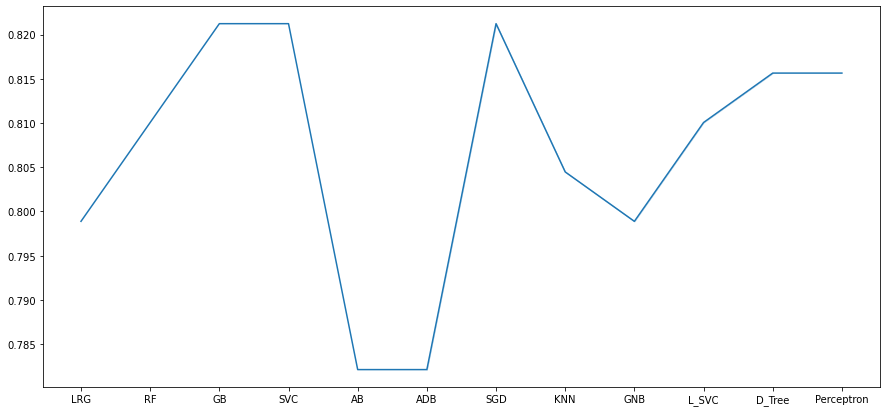

In [340]:
plt.figure(figsize=(15, 7))
sns.lineplot(model_list, score_list)

C:\Users\shuvomamun\anaconda3\Anaconda2109\Anaconda94\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

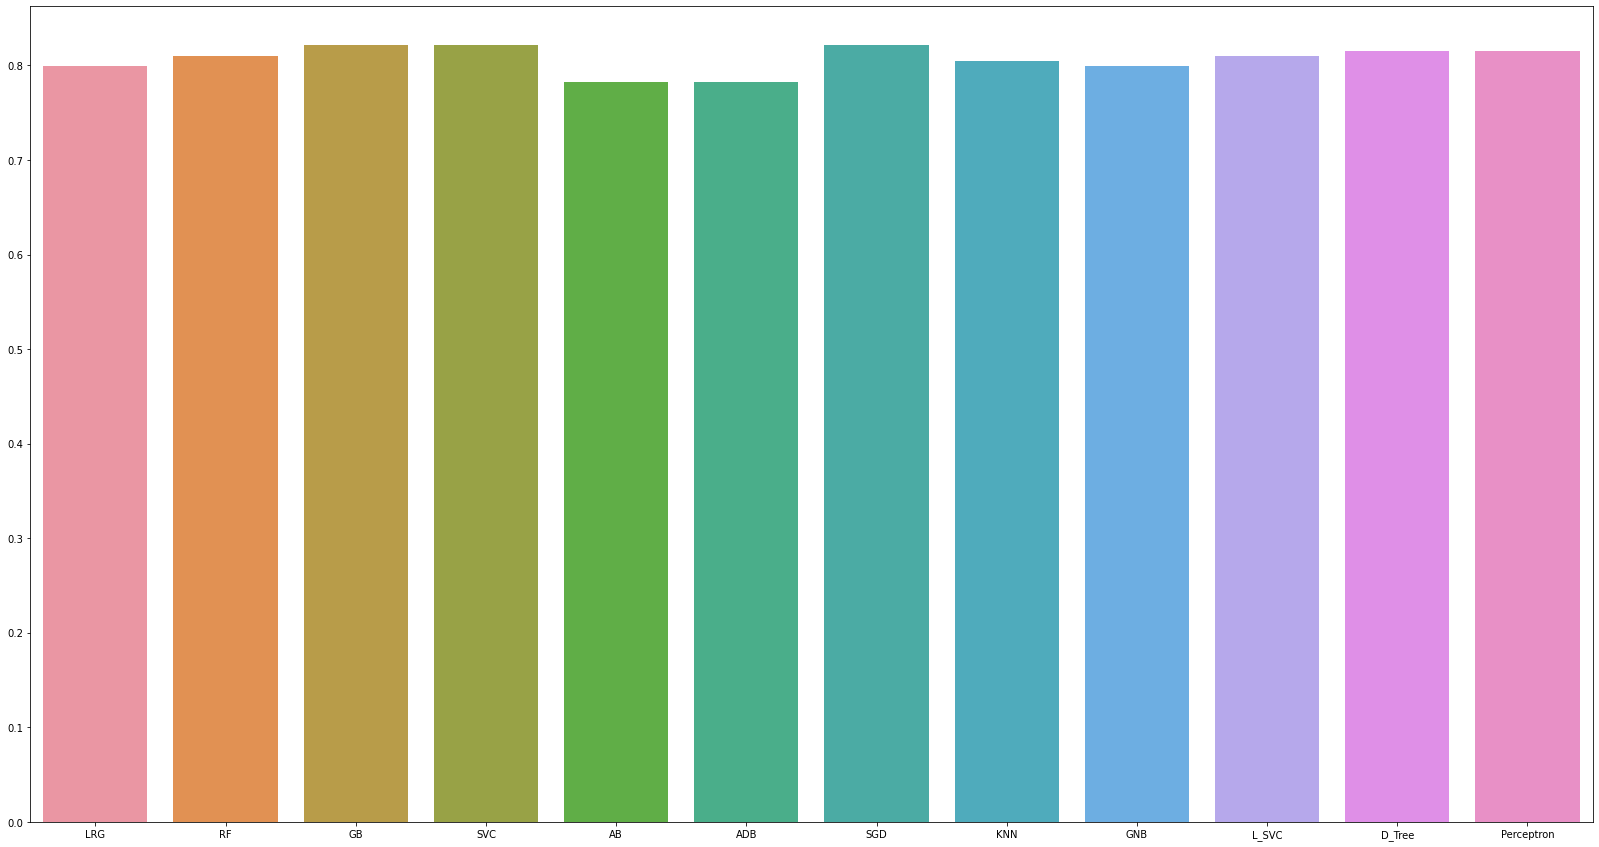

In [343]:
plt.figure(figsize=(28, 15))
sns.barplot(model_list, score_list)